In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

In [7]:
data = pd.read_csv("iris.csv")
data=data.iloc[:,1:]
print(data)
data.head()
data['Species']=data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
data = data[['SepalLengthCm','PetalLengthCm','Species']]
data=np.array(data)
#print(data)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
5              5.4           3.9            1.7           0.4     Iris-setosa
6              4.6           3.4            1.4           0.3     Iris-setosa
7              5.0           3.4            1.5           0.2     Iris-setosa
8              4.4           2.9            1.4           0.2     Iris-setosa
9              4.9           3.1            1.5           0.1     Iris-setosa
10             5.4           3.7            1.5           0.2     Iris-setosa
11             4.8           3.4            1.6           0.2   

In [3]:
##initialising weight matrix with identity matrix
w =np.array([[1,0,0],[0,1,0],[0,0,1]])
print(w)

[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [4]:
X = data[:,:2]
Y = data[:,2]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=40,test_size=.30)

      0    1    2
0   1.0  5.1  1.5
1   1.0  4.9  1.5
2   1.0  4.8  1.9
3   1.0  5.4  1.3
4   1.0  5.0  1.4
5   1.0  5.4  1.5
6   1.0  4.8  1.4
7   1.0  4.7  1.6
8   1.0  4.6  1.4
9   1.0  5.4  1.7
10  1.0  5.2  1.5
11  1.0  5.1  1.5
12  1.0  5.2  1.5
13  1.0  4.9  1.5
14  1.0  5.5  1.4
15  1.0  4.9  1.4
16  1.0  5.1  1.4
17  1.0  5.5  1.3
18  1.0  5.0  1.6
19  1.0  4.5  1.3
20  1.0  5.4  1.7
21  1.0  5.4  1.5
22  1.0  5.0  1.2
23  1.0  5.0  1.6
24  1.0  5.1  1.6
25  1.0  5.1  1.9
26  1.0  4.8  1.6
27  1.0  4.6  1.0
28  1.0  5.8  1.2
29  1.0  4.4  1.4
30  1.0  5.0  1.4
31  1.0  5.1  1.5
32  1.0  4.8  1.4
33  1.0  5.0  1.5


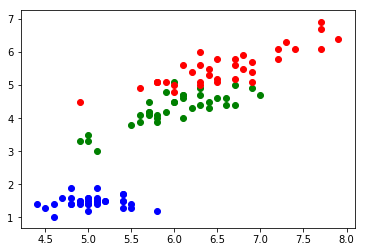

In [5]:
zero = []
one = []
two=[]
for i in range (0, x_train.shape[0]):
    if (y_train[i] == 0):
        zero.append(x_train[i])
    elif (y_train[i] == 1):
        one.append(x_train[i])
    else :
        two.append(x_train[i])
zero = pd.DataFrame(zero)
one = pd.DataFrame(one)
two=pd.DataFrame(two)
print(zero)
plt.scatter(x=zero.iloc[:,1], y=zero.iloc[:,2], c="b")
plt.scatter(x=one.iloc[:,1], y=one.iloc[:,2], c="g")
plt.scatter(x=two.iloc[:,1], y=two.iloc[:,2], c="r")
plt.show()

In [7]:
def multi_class_train(x,y,theta):
    for i in range(0,x_train.shape[0]):
        a = np.dot(x_train[i],theta[0])
        b = np.dot(x_train[i],theta[1])
        c = np.dot(x_train[i],theta[2])
        if max(a,b,c) == a:
            if y_train[i]!=0:
                theta[0]=theta[0] - x_train[i]
                if y_train[i]==1:
                    theta[1]=theta[1] + x_train[i]
                else:
                    theta[2]=theta[2] + x_train[i]
        if max(a,b,c)==b:
            if y_train[i]!=1:
                theta[1]=theta[1] - x_train[i]
                if y_train[i]==0:
                    theta[0]=theta[0] + x_train[i]
                else:
                    theta[2]=theta[2] + x_train[i]
        if max(a,b,c)==c:
            if y_train[i]!=2:
                theta[2]=theta[2] - x_train[i]
                if y_train[i]==0:
                    theta[0]=theta[0] + x_train[i]
                else:
                    theta[1]=theta[1] + x_train[i]
    return theta

In [8]:
def predict_class(x_test,theta):
    predictions = []
    for i in range(0,x_test.shape[0]):
        a = np.dot(x_test[i],theta[0])
        b = np.dot(x_test[i],theta[1])
        c = np.dot(x_test[i],theta[2])
        if max(a,b,c) == a:
            predictions.append(0)
        if max(a,b,c) == b:
            predictions.append(1)
        if max(a,b,c) == c:
            predictions.append(2)
    return predictions

In [9]:
def accuracy(predicted,y_test):
    count = 0
    for i in range(y_test.shape[0]):
        if predicted[i] == y_test[i]:
            count = count + 1
    print((count/y_test.shape[0])*100)

In [10]:
for i in range(0,1000):
    p=multi_class_train(x_train,y_train,w)

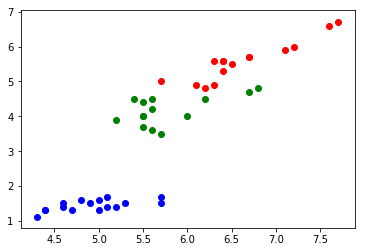

In [11]:
predicted = predict_class(x_test,p)
# predicted
zero1 = []
one1 = []
two1=[]
for i in range (0, x_test.shape[0]):
    if (y_test[i] == 0):
        zero1.append(x_test[i])
    elif (y_test[i] == 1):
        one1.append(x_test[i])
    else :
        two1.append(x_test[i])
zero1 = pd.DataFrame(zero1)
one1 = pd.DataFrame(one1)
two1=pd.DataFrame(two1)
    
plt.scatter(x=zero1.iloc[:,1], y=zero1.iloc[:,2], c="b")
plt.scatter(x=one1.iloc[:,1], y=one1.iloc[:,2], c="g")
plt.scatter(x=two1.iloc[:,1], y=two1.iloc[:,2], c="r")
plt.show()

In [12]:
print("Predicted\t", "actual")
for i in range(y_test.shape[0]):
    print('{} \t\t {}' .format(predicted[i], y_test[i]))

Predicted	 actual
0 		 0.0
1 		 1.0
2 		 2.0
2 		 2.0
1 		 1.0
2 		 2.0
1 		 1.0
1 		 1.0
1 		 1.0
0 		 0.0
1 		 1.0
0 		 0.0
0 		 0.0
1 		 2.0
1 		 1.0
2 		 2.0
1 		 2.0
2 		 2.0
1 		 1.0
1 		 1.0
2 		 2.0
2 		 2.0
1 		 1.0
0 		 0.0
1 		 1.0
0 		 0.0
0 		 0.0
2 		 2.0
0 		 0.0
1 		 1.0
1 		 1.0
0 		 0.0
0 		 0.0
0 		 0.0
0 		 0.0
2 		 2.0
0 		 0.0
0 		 0.0
1 		 2.0
0 		 0.0
0 		 0.0
1 		 1.0
1 		 2.0
2 		 2.0
2 		 2.0


In [13]:
accuracy(predicted,y_test)

91.11111111111111


In [21]:
print("Final weight matrix is ")
print(w)
print(w[1][0])

Final weight matrix is 
[[ 30  37 -58]
 [ 70   1  -6]
 [-99  -1  29]]
70


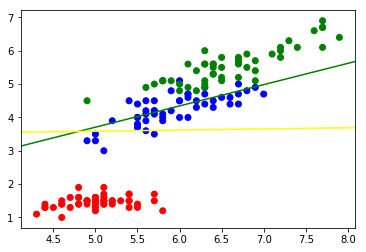

In [27]:
colors = ['r','b','g']
plt.scatter(np.array(data)[:,0], np.array(data)[:,1], c = Y.reshape(-1), cmap=ListedColormap(colors))
ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
w_guess1 = w[0][1:]
b_guess1 = w[0][0]
y_vals1 = -(x_vals * w_guess1[0] + b_guess1)/w_guess1[1]
plt.plot(x_vals, y_vals1, '-', c="green")

w_guess2 = w[1][1:]
b_guess2 = w[1][0]
y_vals2 = -(x_vals * w_guess2[0] + b_guess2)/w_guess2[1]
plt.plot(x_vals, y_vals2, c="blue")

w_guess3 = w[2][1:]
b_guess3 = w[2][0]
y_vals3 = -(x_vals * w_guess3[0] + b_guess3)/w_guess3[1]
plt.plot(x_vals, y_vals3, '-', c="yellow")